 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [14]:
df = pd.read_csv("tunnel.csv",
        index_col='Day',
        parse_dates=['Day'],
)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

In [27]:
df.head(3)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795


In [ ]:
df.shape

In [ ]:
df.info()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Summary Statistics</p>

In [ ]:
df.describe()

In [37]:
%config InlineBackend.figure_format = 'retina'

In [19]:
from pathlib import Path
from warnings import simplefilter

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [20]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

In [21]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [23]:
df = df.reset_index()

In [24]:
df = df.set_index("Day").to_period("D")

C:\Users\adams\AppData\Local\Temp\ipykernel_13260\1565446183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
C:\Users\adams\AppData\Local\Temp\ipykernel_13260\1565446183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


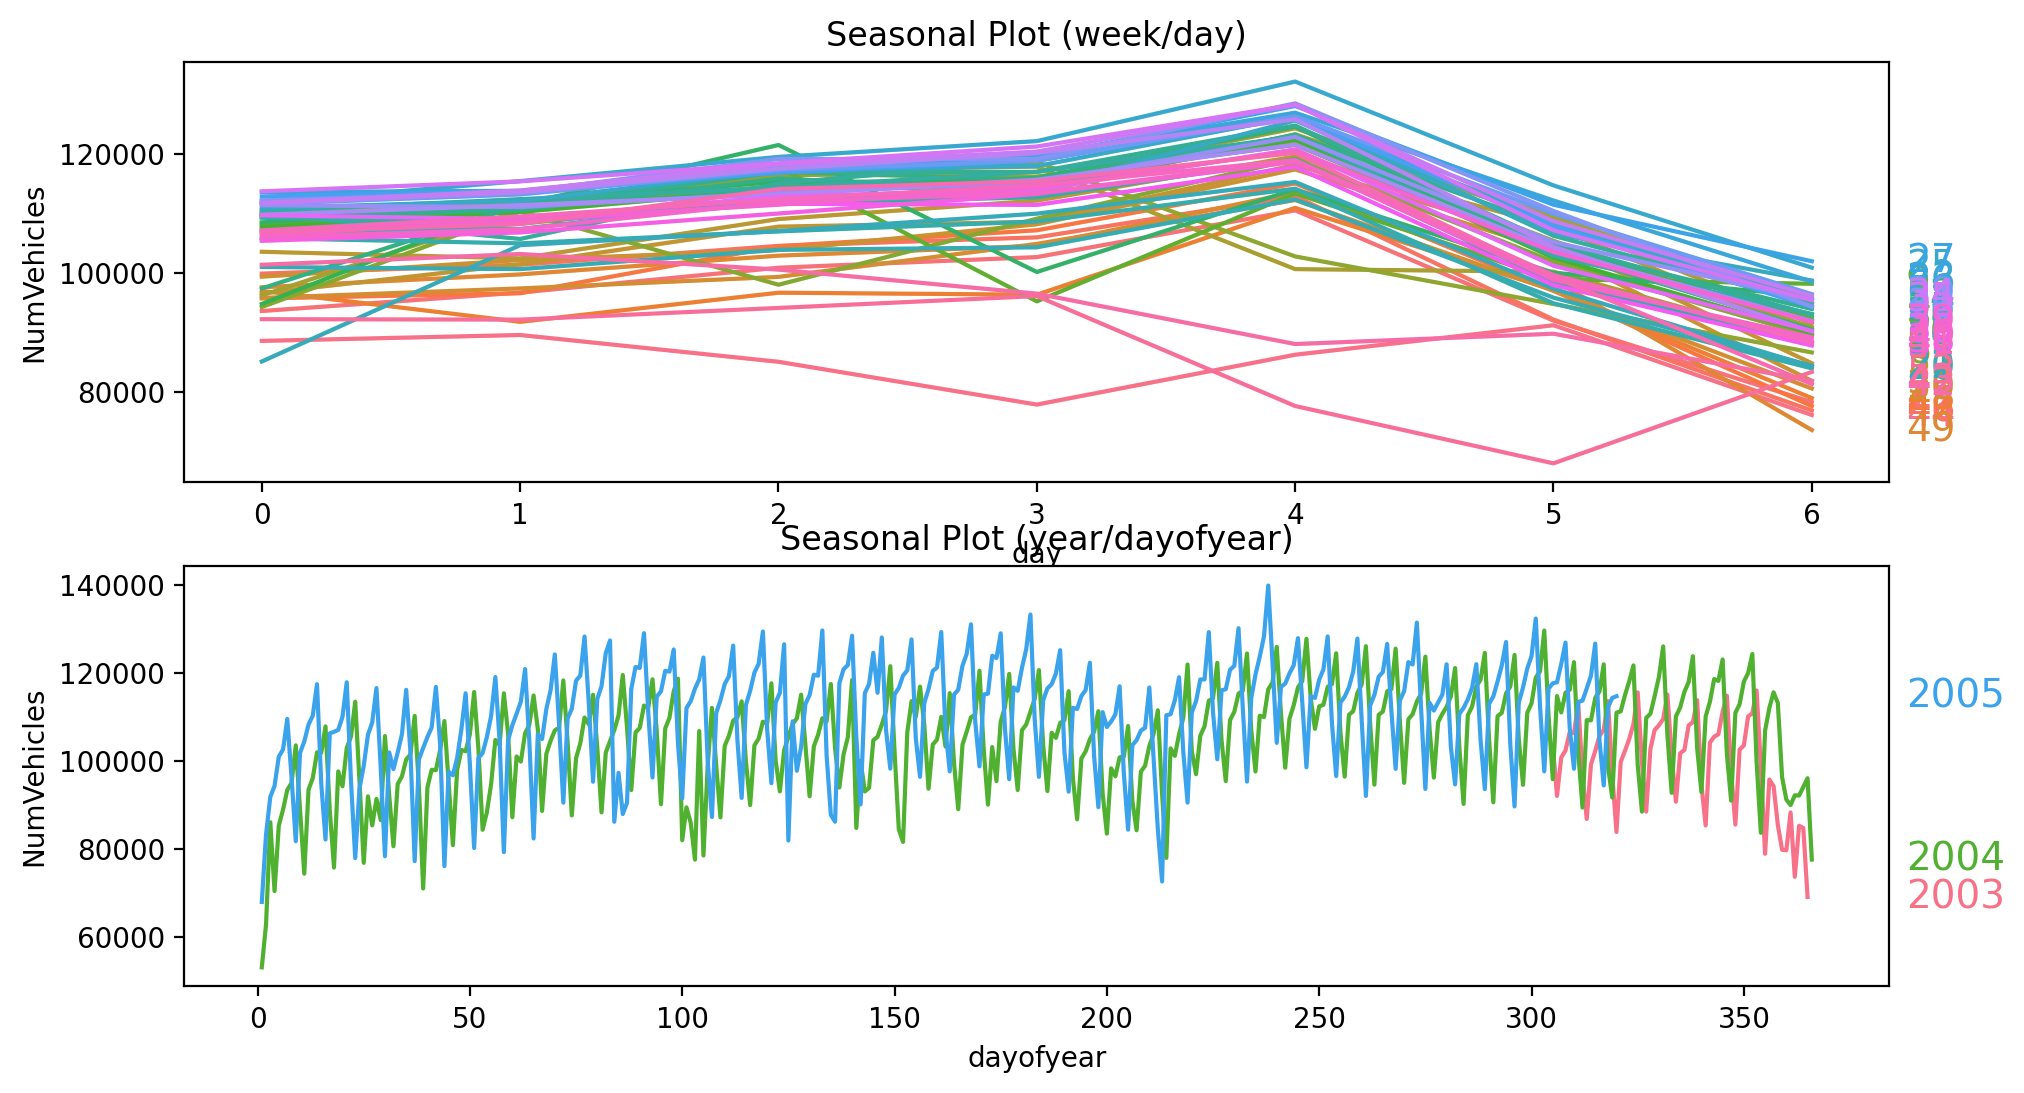

In [26]:
# Let's take a look at seasonal plots over a week and over a year.

X = df.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

C:\Users\adams\AppData\Local\Temp\ipykernel_13260\535609489.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=X, x='day',marker='o', y='NumVehicles', ci=None, color='blue')


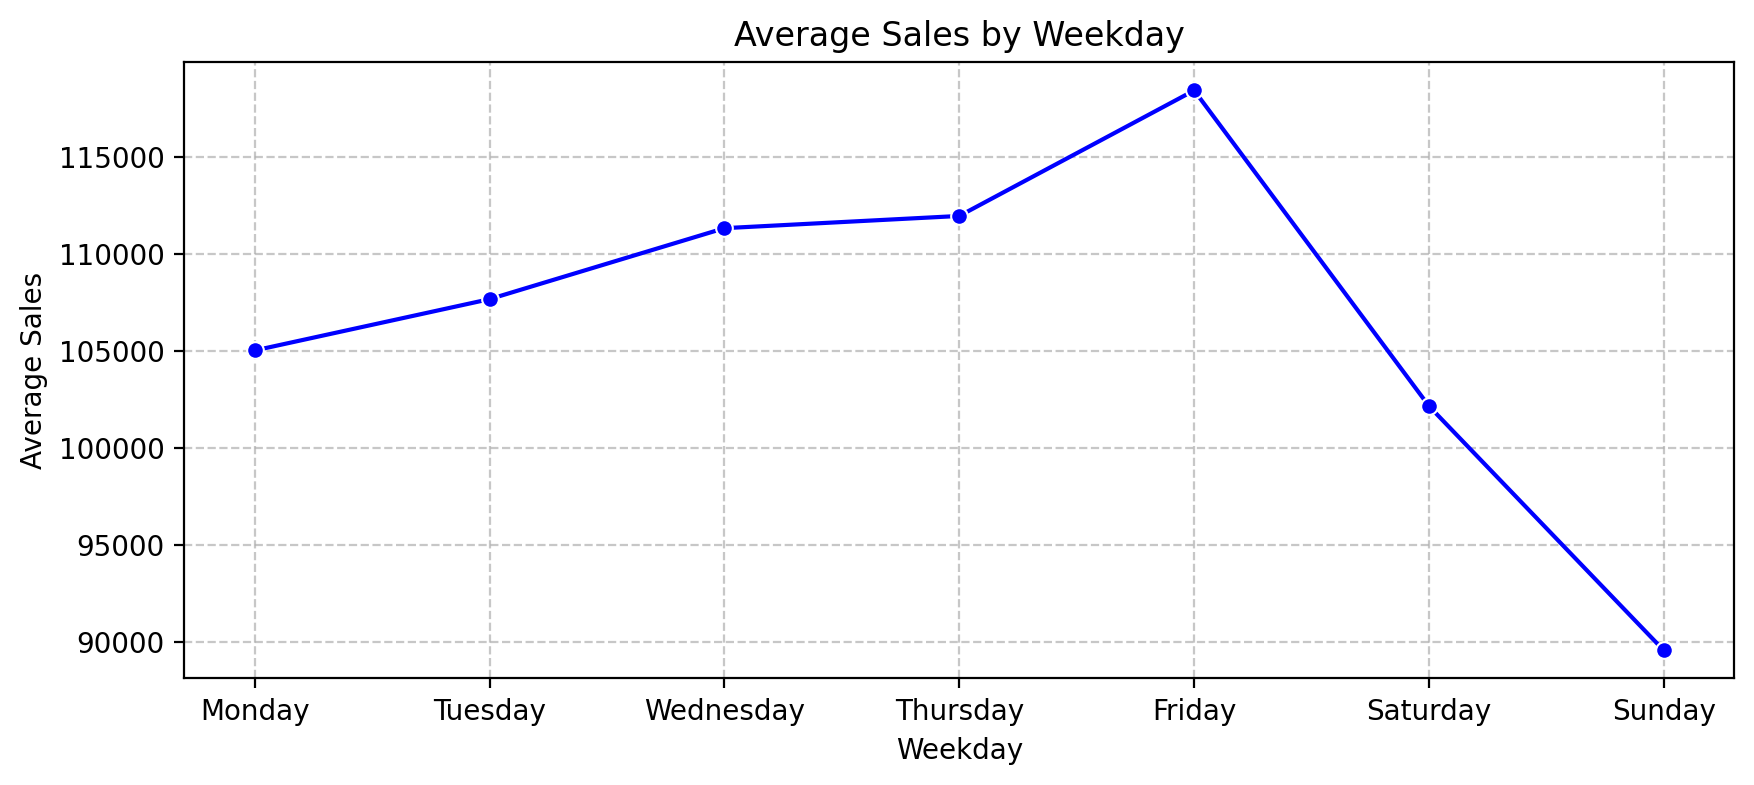

In [28]:
plt.figure(figsize=(10, 4))

# Plot using seaborn and matplotlib
sns.lineplot(data=X, x='day',marker='o', y='NumVehicles', ci=None, color='blue')

# Adding title and labels
plt.title('Average Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')

# Customizing the x-axis labels
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(7), labels=weekday_names)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\adams\AppData\Local\Temp\ipykernel_13260\4033231040.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=X, x='dayofyear',marker='o', y='NumVehicles', ci=None, color='blue')


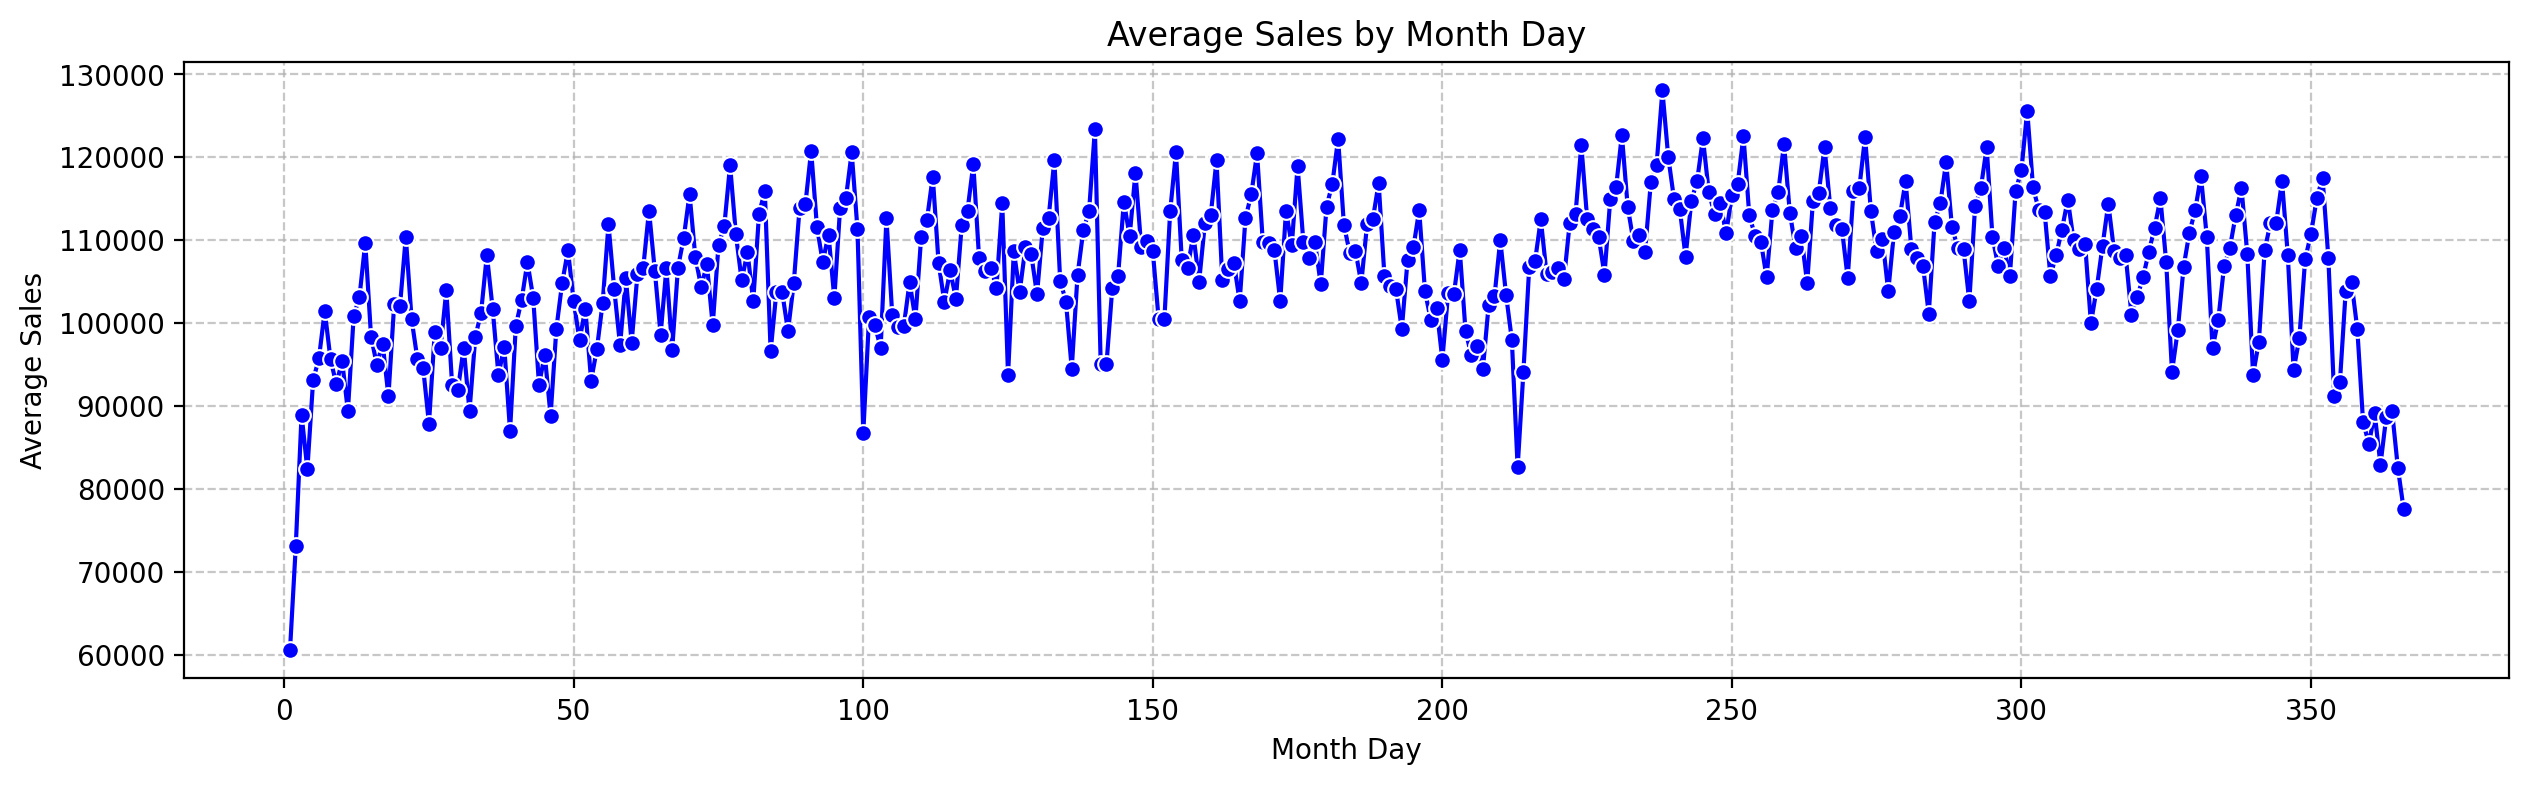

In [31]:
plt.figure(figsize=(15, 4))

# Plot using seaborn and matplotlib
sns.lineplot(data=X, x='dayofyear',marker='o', y='NumVehicles', ci=None, color='blue')

# Adding title and labels
plt.title('Average Sales by Month Day')
plt.xlabel('Month Day')
plt.ylabel('Average Sales')

# Customizing the x-axis labels
# plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
# plt.tight_layout()
plt.show()

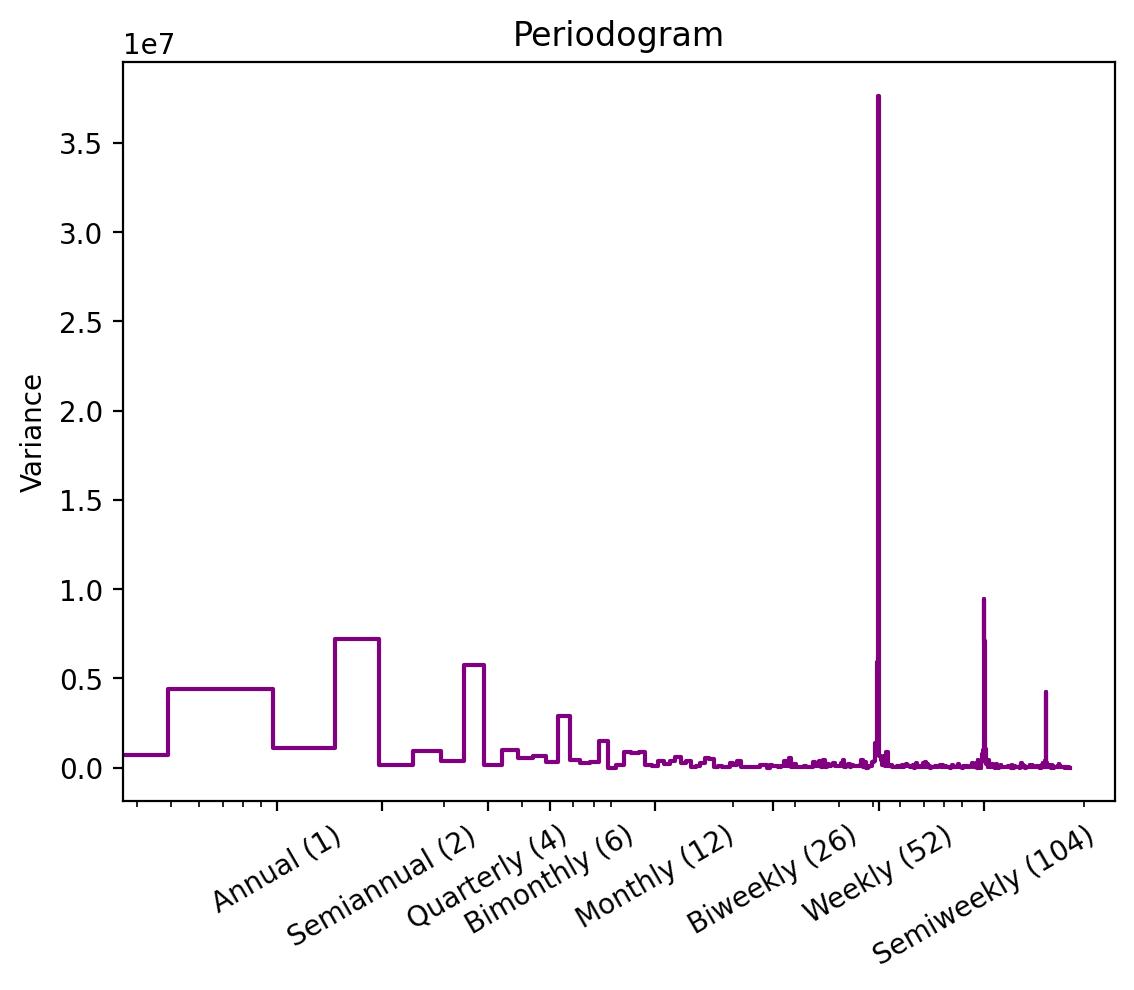

In [32]:
plot_periodogram(df.NumVehicles);

In [33]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

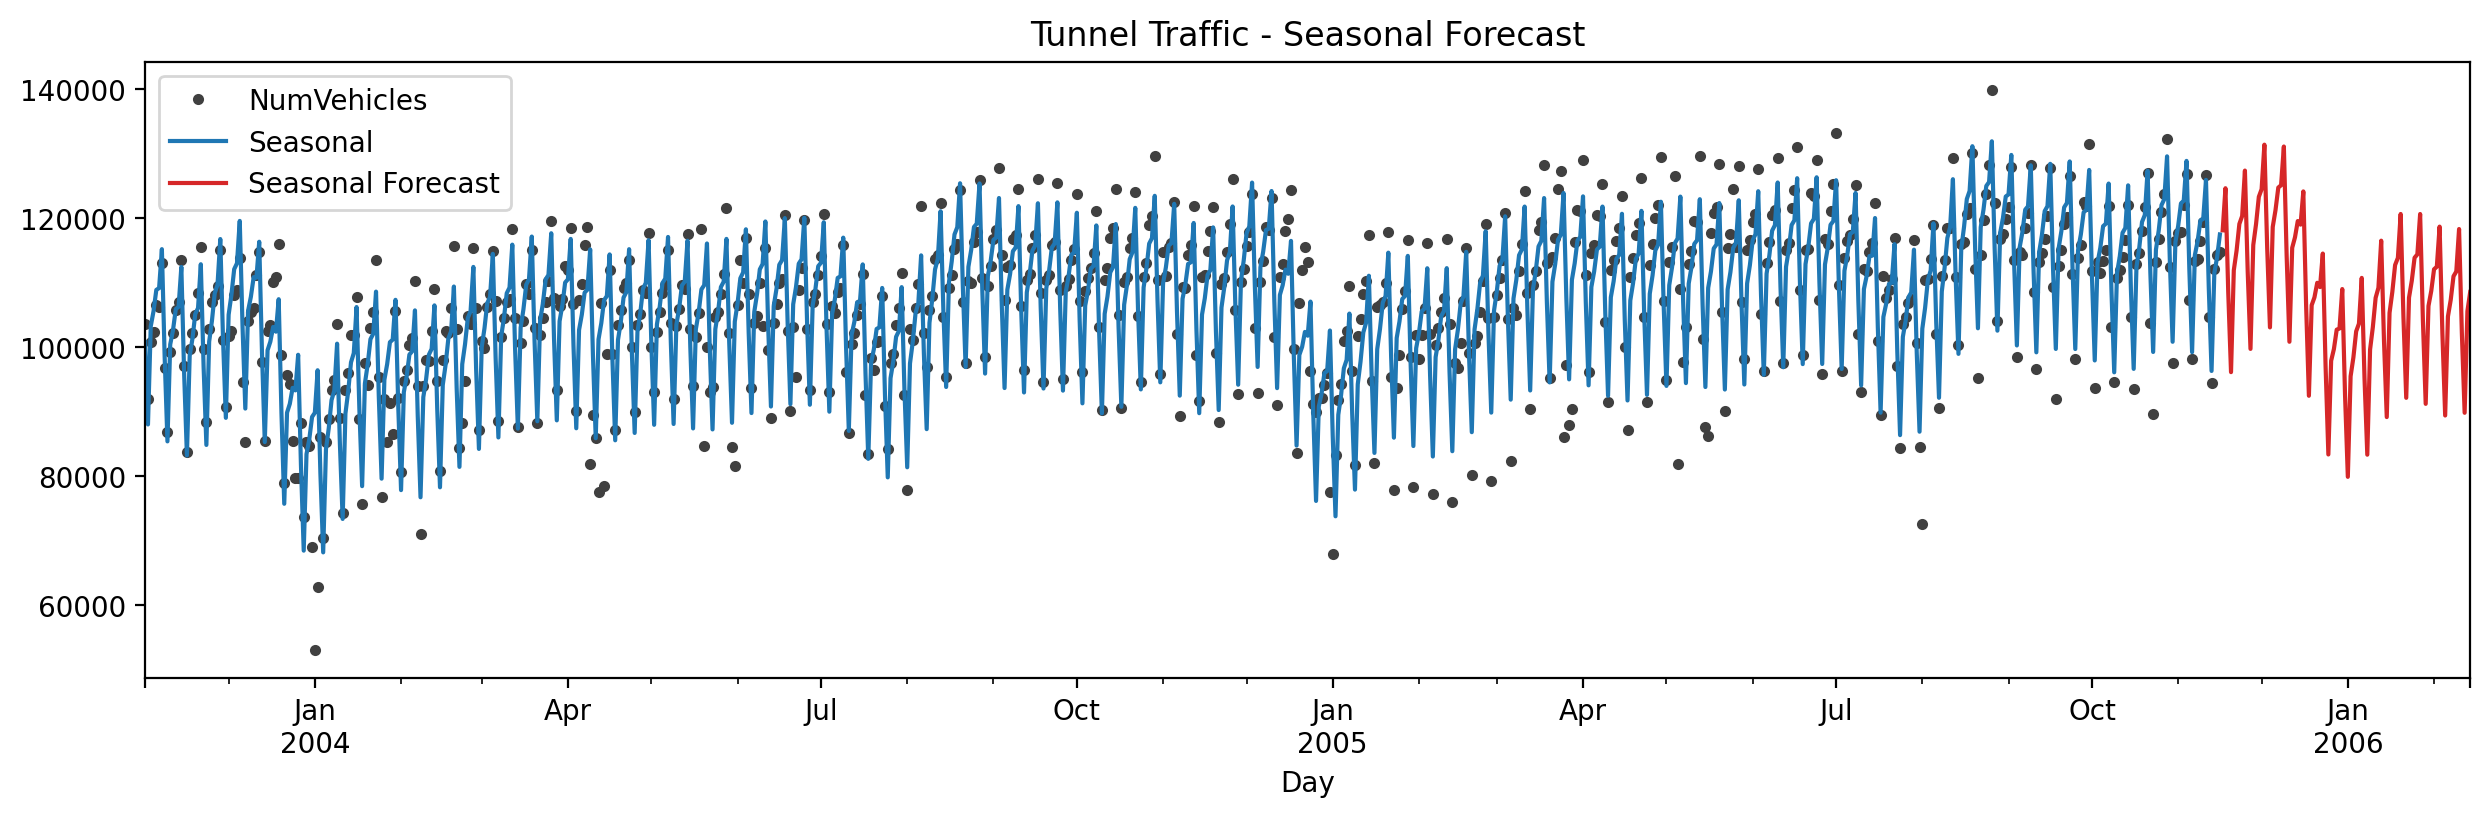

In [38]:
y = df["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

plt.figure(figsize=(15, 4))
ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()